In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
train_df = pd.read_csv('/root/tempfile/train_final121101.csv')
test_df = pd.read_csv('/root/tempfile/test_final121101.csv')

In [3]:
str_label = [
    'auth_merchant_id_cal_mode',
    'unauth_merchant_id_cal_mode', 
    'new_merchant_id_cal_mode'
]
for i in str_label:
    le = LabelEncoder()
    unique = train_df[i].append(test_df[i]).unique().tolist()
    le.fit(unique)
    train_df[i] = le.transform(train_df[i].tolist())
    test_df[i] = le.transform(test_df[i].tolist())

In [4]:
for i in train_df.columns:
    if train_df[i].dtype == object:
        print(i)

card_id


In [5]:
feature_col = [x for x in train_df.columns if x not in ['card_id','target']]
y_train = train_df.target.values.astype('float')
x_train = train_df[feature_col].values.astype('float')
x_test = test_df[feature_col].values.astype('float')

In [6]:
c_label = ['feature_1',
           'feature_2',
           'feature_3',
           'auth_city_id_cal_mode',
           'auth_merchant_category_id_cal_mode',
           'auth_merchant_id_cal_mode',
           'auth_state_id_cal_mode',
           'auth_subsector_id_cal_mode',
           'auth_dayofweek_cal_mode',
           'unauth_city_id_cal_mode',
           'unauth_merchant_category_id_cal_mode',
           'unauth_merchant_id_cal_mode',
           'unauth_state_id_cal_mode',
           'unauth_subsector_id_cal_mode',
           'unauth_dayofweek_cal_mode',
           'new_city_id_cal_mode',
           'new_merchant_category_id_cal_mode',
           'new_merchant_id_cal_mode',
           'new_state_id_cal_mode',
           'new_subsector_id_cal_mode',
           'new_dayofweek_cal_mode']

In [7]:
lgb_model = lgb.LGBMRegressor(objective='regression',
                              num_leaves=50,
                              learning_rate=0.1, 
                              n_estimators=43, 
                              max_depth=8,
                              metric='rmse',
                              bagging_fraction = 0.8,
                              feature_fraction = 0.8)

params_test1={
    'max_depth': range(3,14,2),
    'num_leaves':range(50, 130, 30)
}
gsearch1 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test1,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=3)

gs1 = gsearch1.fit(x_train, y_train)#feature_name=feature_col, categorical_feature=c_label)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  5.0min
/root/anaconda3/envs/jupyter/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed: 11.7min finished


In [8]:
print(gs1.best_params_, gs1.best_score_)

{'max_depth': 7, 'num_leaves': 50} -13.469155245835221


In [9]:
params_test2={
    'max_depth': [6, 7, 8],
    'num_leaves':range(30, 80, 10)
}
gsearch2= GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test2,
                        scoring='neg_mean_squared_error', 
                        cv=10,
                        verbose=1, 
                        n_jobs=3)

gs2 = gsearch2.fit(x_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/root/anaconda3/envs/jupyter/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  6.0min
[Parallel(n_jobs=3)]: Done 150 out of 150 | elapsed: 20.7min finished


In [10]:
print(gs2.best_params_, gs2.best_score_)

{'max_depth': 6, 'num_leaves': 40} -13.437816074079736


In [14]:
params_test3={
    'max_depth': [5, 6, 7, 8],
    'num_leaves':range(30, 50, 5)
}
gsearch3 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test3,
                        scoring='neg_mean_squared_error', 
                        cv=10,
                        verbose=1, 
                        n_jobs=3)

gs3 = gsearch3.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  5.3min
[Parallel(n_jobs=3)]: Done 160 out of 160 | elapsed: 20.7min finished


In [15]:
print(gs3.best_params_, gs3.best_score_)

{'max_depth': 6, 'num_leaves': 45} -13.437167717193836


In [16]:
params_test4={
    'max_depth': [6],
    'num_leaves':range(40, 50, 2)
}
gsearch4 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test4,
                        scoring='neg_mean_squared_error', 
                        cv=10,
                        verbose=1, 
                        n_jobs=3)

gs4 = gsearch4.fit(x_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  6.0min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  6.8min finished


In [17]:
print(gs4.best_params_, gs4.best_score_)

{'max_depth': 6, 'num_leaves': 48} -13.434647425731427


In [18]:
params_test5={
    'max_depth': [6],
    'num_leaves':[48],
    'min_child_samples': [18, 19, 20, 21, 22],
    'min_child_weight':[0.001, 0.002]

}
gsearch5 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test5,
                        scoring='neg_mean_squared_error', 
                        cv=10,
                        verbose=1, 
                        n_jobs=3)

gs5 = gsearch5.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  6.0min
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed: 13.6min finished


In [20]:
print(gs5.best_params_, gs5.best_score_)

{'max_depth': 6, 'min_child_samples': 21, 'min_child_weight': 0.001, 'num_leaves': 48} -13.42429454447493


In [21]:
params_test6={
    'max_depth': [6],
    'num_leaves':[48],
    'min_child_samples': [21],
    'min_child_weight':[0.001],
    'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0]
}
gsearch6 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test6,
                        scoring='neg_mean_squared_error', 
                        cv=10,
                        verbose=1, 
                        n_jobs=3)

gs6 = gsearch6.fit(x_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/root/anaconda3/envs/jupyter/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  5.7min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 24.7min
[Parallel(n_jobs=3)]: Done 250 out of 250 | elapsed: 31.9min finished


In [22]:
print(gs6.best_params_, gs6.best_score_)

{'bagging_fraction': 0.6, 'feature_fraction': 0.8, 'max_depth': 6, 'min_child_samples': 21, 'min_child_weight': 0.001, 'num_leaves': 48} -13.42429454447493


In [23]:
params_test7={
    'max_depth': [6],
    'num_leaves':[48],
    'min_child_samples': [21],
    'min_child_weight':[0.001],
    'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],  
    'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]
}
gsearch7 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test7,
                        scoring='neg_mean_squared_error', 
                        cv=10,
                        verbose=1, 
                        n_jobs=3)

gs7 = gsearch7.fit(x_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  6.2min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 26.2min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 60.0min
[Parallel(n_jobs=3)]: Done 490 out of 490 | elapsed: 66.2min finished


In [24]:
print(gs7.best_params_, gs7.best_score_)

{'max_depth': 6, 'min_child_samples': 21, 'min_child_weight': 0.001, 'num_leaves': 48, 'reg_alpha': 0, 'reg_lambda': 0} -13.42429454447493


In [28]:
params_test7={
    'max_depth': 6,
    'num_leaves':48,
    'min_child_samples': 21,
    'min_child_weight':0.001,
    'learning_rate':0.005, 
    'num_iterations':5000
}
data_train = lgb.Dataset(x_train, y_train, silent=True)
lgb_model = lgb.train(
    params_test7,
    data_train,
    num_boost_round=10000, 
    verbose_eval=100)

/root/anaconda3/envs/jupyter/lib/python3.7/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [30]:
feature_importance = lgb_model.feature_importance()

In [34]:
feature_importance

array([2164, 4062,  676,  372,  219,  809, 2048,  990,  542,  296,  666,
        929, 2452,    0,  972, 1188, 1918, 1925,  376,  503,  854, 1363,
       1608,  845,  216,  177,  453,  997, 1012,  455,  351,  628,  661,
          0, 1014,  902,  224,  398,  638,  720, 1979, 2810, 2472, 5434,
       1067,  774,  598, 1264,  551, 1081, 1233,   21,  103, 1233, 7765,
        478, 1601, 2366,  473,  590,  749, 2434,  590,  800,  546, 1285,
        354,  436,  443,  741, 3264,  746,  409,  148,  905,  296,  347,
        262,  148,  273,  214,  101,  443,  341,   79,  593,  275,  120,
       1527, 1377, 1091, 1187, 1835,  723, 1053, 1409,  960, 2099, 1148,
        135,   72, 1560, 8192,  359, 1237,  445, 1910, 1571, 1395,  661,
        758, 1088,  967,  572, 1128,  960,  799, 1165,  823,  778,    0,
          0, 1093, 1016,  505,  546,  713,  640,  775,  585,  770,  900,
        567,  876, 1160, 1572, 2152, 1653,  883, 1331, 1296, 1675,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [37]:
importance_df = pd.DataFrame({'importance':feature_importance,'name':feature_col})

In [39]:
importance_df.shape

(227, 2)

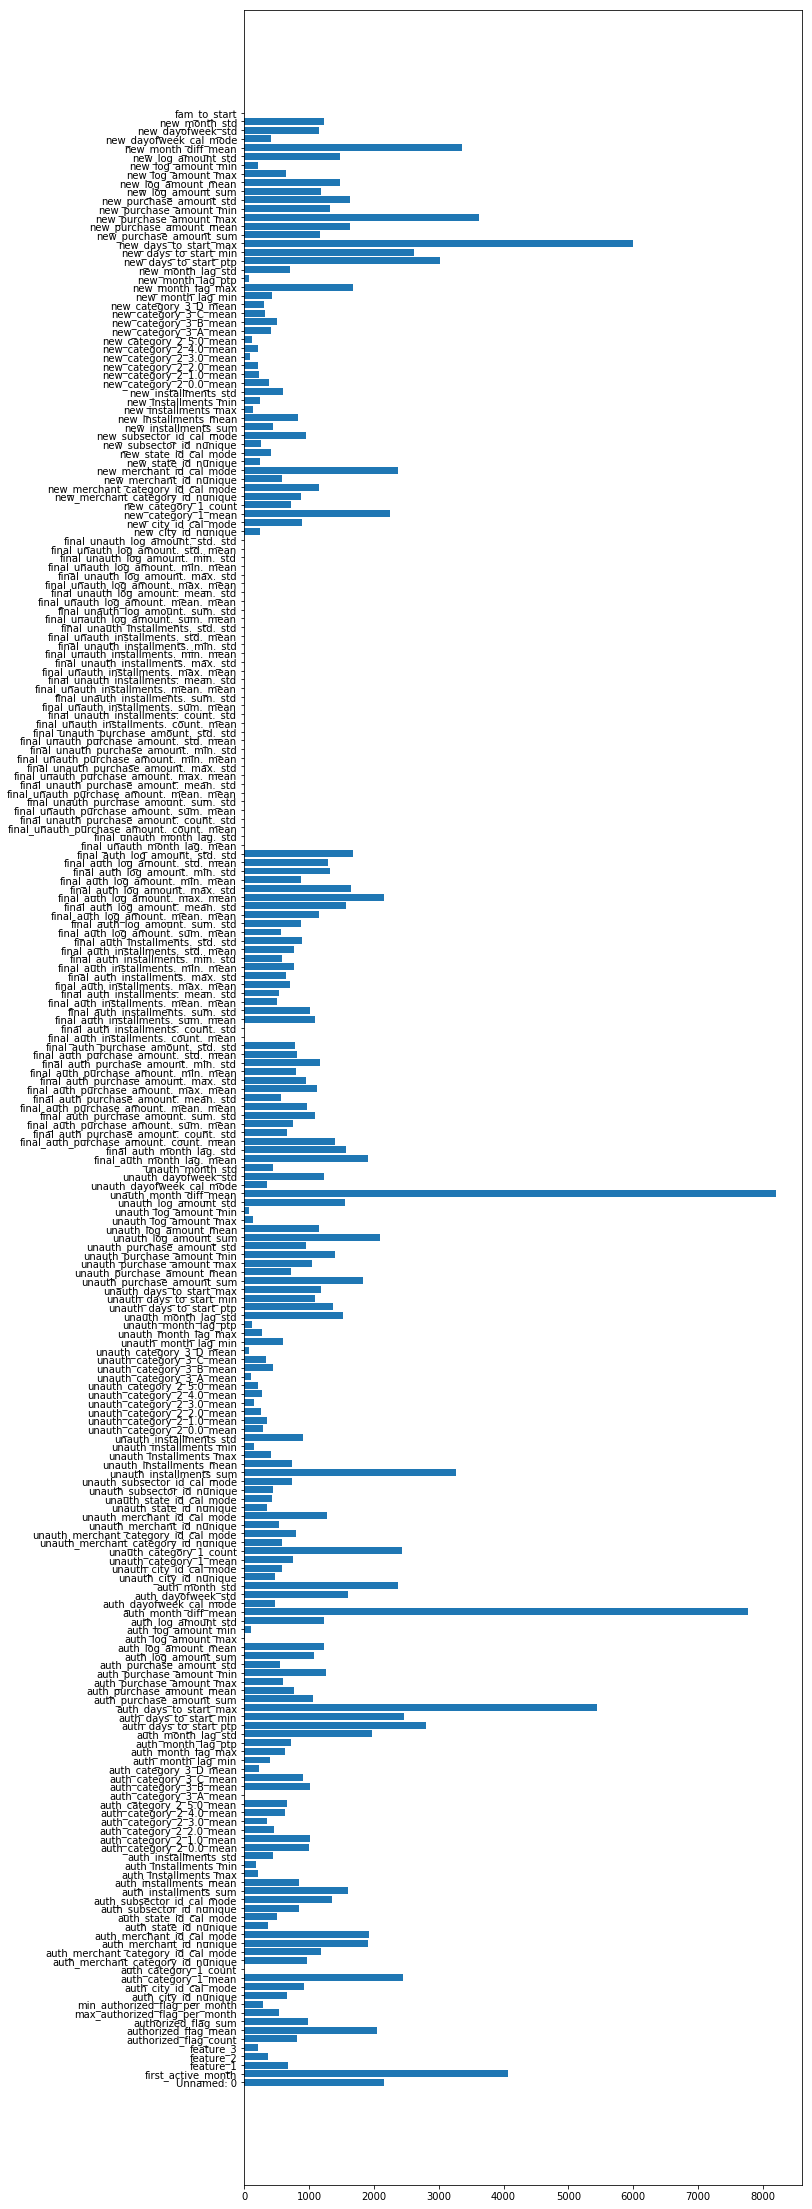

In [40]:
plt.figure(figsize=[10,40])
plt.barh(importance_df.name, importance_df.importance)
plt.show()

我们可以看到，所有的final_unauth 都是没有用的。

In [41]:
y_test = lgb_model.predict(x_test)

In [44]:
submission = pd.DataFrame({'card_id':test_df.card_id, 'target':y_test})

In [45]:
submission.to_csv('/root/tempfile/submission121201.csv',index=False)